In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [8]:
df = pd.read_excel("Artisans.xlsx")
print(df.head())

   Sr. No. Pahchan card number Name of the Artisan  \
0        1          SRMGC27492          S. SHAHENA   
1        2          SRMGC27493         P. CHANDINI   
2        3          SRMGC27494        S. NOORJAHAN   
3        4          SRMGC27495           S. RESHMA   
4        5          SRMGC27496           D. RESHMA   

                            Craft  Mobile number of the Artisan  Gender  \
0  Embroidered & Crochetted goods                  8.978525e+09  Female   
1  Embroidered & Crochetted goods                  9.989406e+09  Female   
2  Embroidered & Crochetted goods                  9.908788e+09  Female   
3  Embroidered & Crochetted goods                  9.502235e+09  Female   
4  Embroidered & Crochetted goods                  8.125544e+09  Female   

                 Address of the Artisan            State  
0  3-148-1C-8A M.P.L MADANAPALLI 517325  Andhra pradesh   
1       1-76-4 M.P.L MADANAPALLI 517325  Andhra pradesh   
2         4-89 M.P.L MADANAPALLI 517325  Andhra

In [9]:
gender_craft_counts = df.groupby(['Craft', 'Gender']).size().unstack(fill_value=0)

# Display the grouped data
print(gender_craft_counts)


Gender                           Female  Male
Craft                                        
(Misc) Kalamkari Painting             0     1
Applique                             43     1
Art metal ware                       12   107
Beads craft                          26     9
Bidri                                 3     0
Cane & Bamboo                       172   207
Carpet & other floor coverings        3     4
Doll & toys                          10     2
Embroidered & Crochetted goods      292    41
Fabric Painting                      18     1
Filigree & silverware                 0     1
Furniture                             0     3
Glass Beads                           0     2
Gold Smith                           35  1567
Grass leafred & fiber                 0     1
Grass, leaf,red & fiber               0     1
Hand Block Printing                  90     4
Hand printed Textiles Scarves        10    13
Immitation Jewellery                 44    27
Incense sticks                    

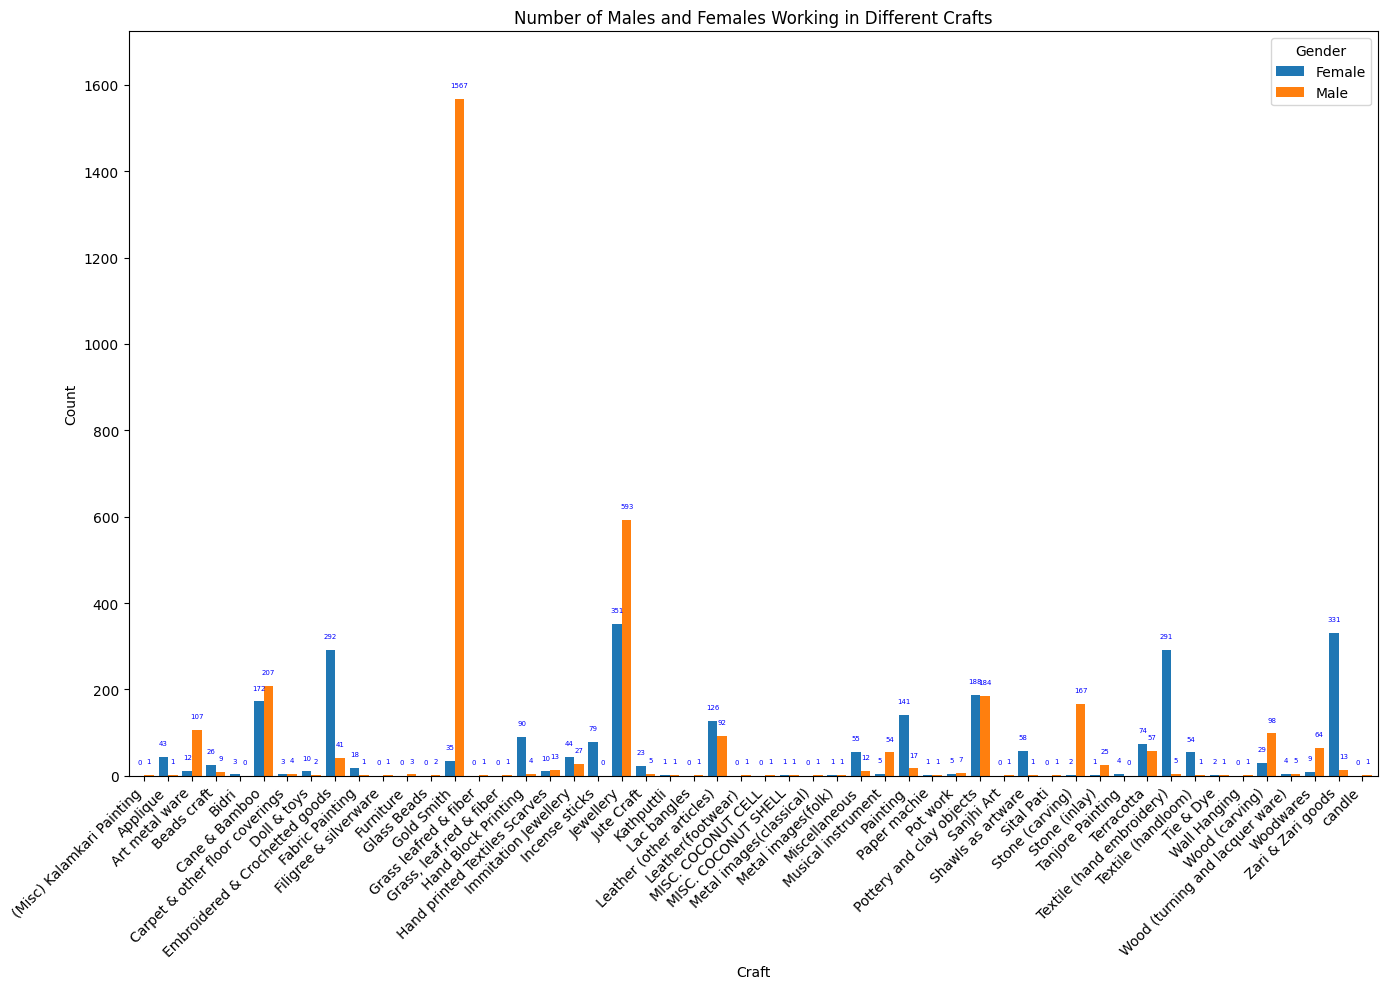

In [10]:
ax = gender_craft_counts.plot(kind='bar', figsize=(14, 10), width=0.8)

plt.title('Number of Males and Females Working in Different Crafts')
plt.xlabel('Craft')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

plt.ylim(0, gender_craft_counts.values.max() * 1.1)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=5, color='blue', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [11]:
df.columns

Index(['Sr. No.', 'Pahchan card number', 'Name of the Artisan', 'Craft',
       'Mobile number of the Artisan', 'Gender', 'Address of the Artisan',
       'State'],
      dtype='object')

In [12]:
print(df['State'].unique())

['Andhra pradesh ' 'Karnataka' 'Maharashtra']


In [13]:
# Group by 'State' and 'Gender', then count occurrences
state_gender_counts = df.groupby(['State', 'Gender']).size().unstack(fill_value=0)

# Display the grouped data
print(state_gender_counts)


Gender           Female  Male
State                        
Andhra pradesh      637  1363
Karnataka           951  1049
Maharashtra        1006   994


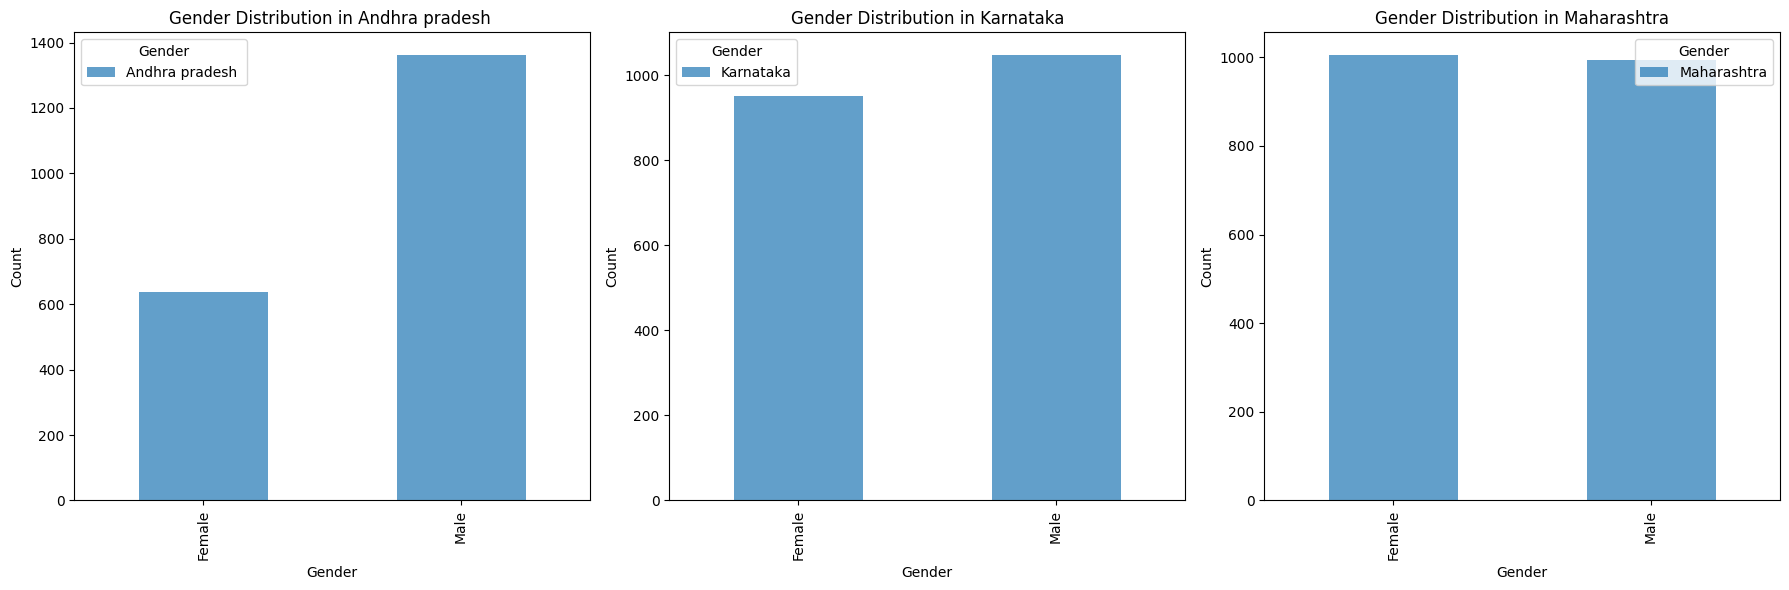

In [14]:
gender_counts_by_state = df.groupby(['State', 'Gender']).size().unstack(fill_value=0)

# Plotting for each state
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, state in enumerate(gender_counts_by_state.index):
    gender_counts = gender_counts_by_state.loc[state]
    gender_counts.plot(kind='bar', stacked=True, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Gender Distribution in {state}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')
    axes[i].legend().set_title('Gender')

plt.tight_layout()
plt.show()


In [15]:
print(df['Craft'].unique())

['Embroidered & Crochetted goods' 'Wood (carving)' 'Woodwares'
 'Stone (carving)' 'Stone (inlay)' 'Gold Smith' 'Glass Beads' 'Jewellery'
 'Zari & Zari goods' 'Miscellaneous' 'Cane & Bamboo' 'Doll & toys'
 'Beads craft' 'Terracotta' 'Textile (hand embroidery)'
 'Textile (handloom)' 'Immitation Jewellery'
 'Hand printed Textiles Scarves' 'Hand Block Printing' nan
 'Art metal ware' 'Fabric Painting' 'Furniture'
 'Carpet & other floor coverings' 'Leather (other articles)' 'Painting'
 'Pottery and clay objects' 'Wood (turning and lacquer ware)'
 'Metal images(classical)' 'Paper machie' 'Metal images(folk)'
 'Incense sticks' 'Pot work' 'Jute Craft' 'Applique' 'candle'
 'MISC. COCONUT SHELL' 'Tanjore Painting' 'Tie & Dye' 'Sanjhi Art'
 'Grass leafred & fiber' 'Sital Pati' 'Filigree & silverware'
 'MISC. COCONUT CELL' '(Misc) Kalamkari Painting' 'Lac bangles'
 'Leather(footwear)' 'Musical instrument' 'Wall Hanging' 'Bidri'
 'Kathputtli' 'Grass, leaf,red & fiber' 'Shawls as artware']


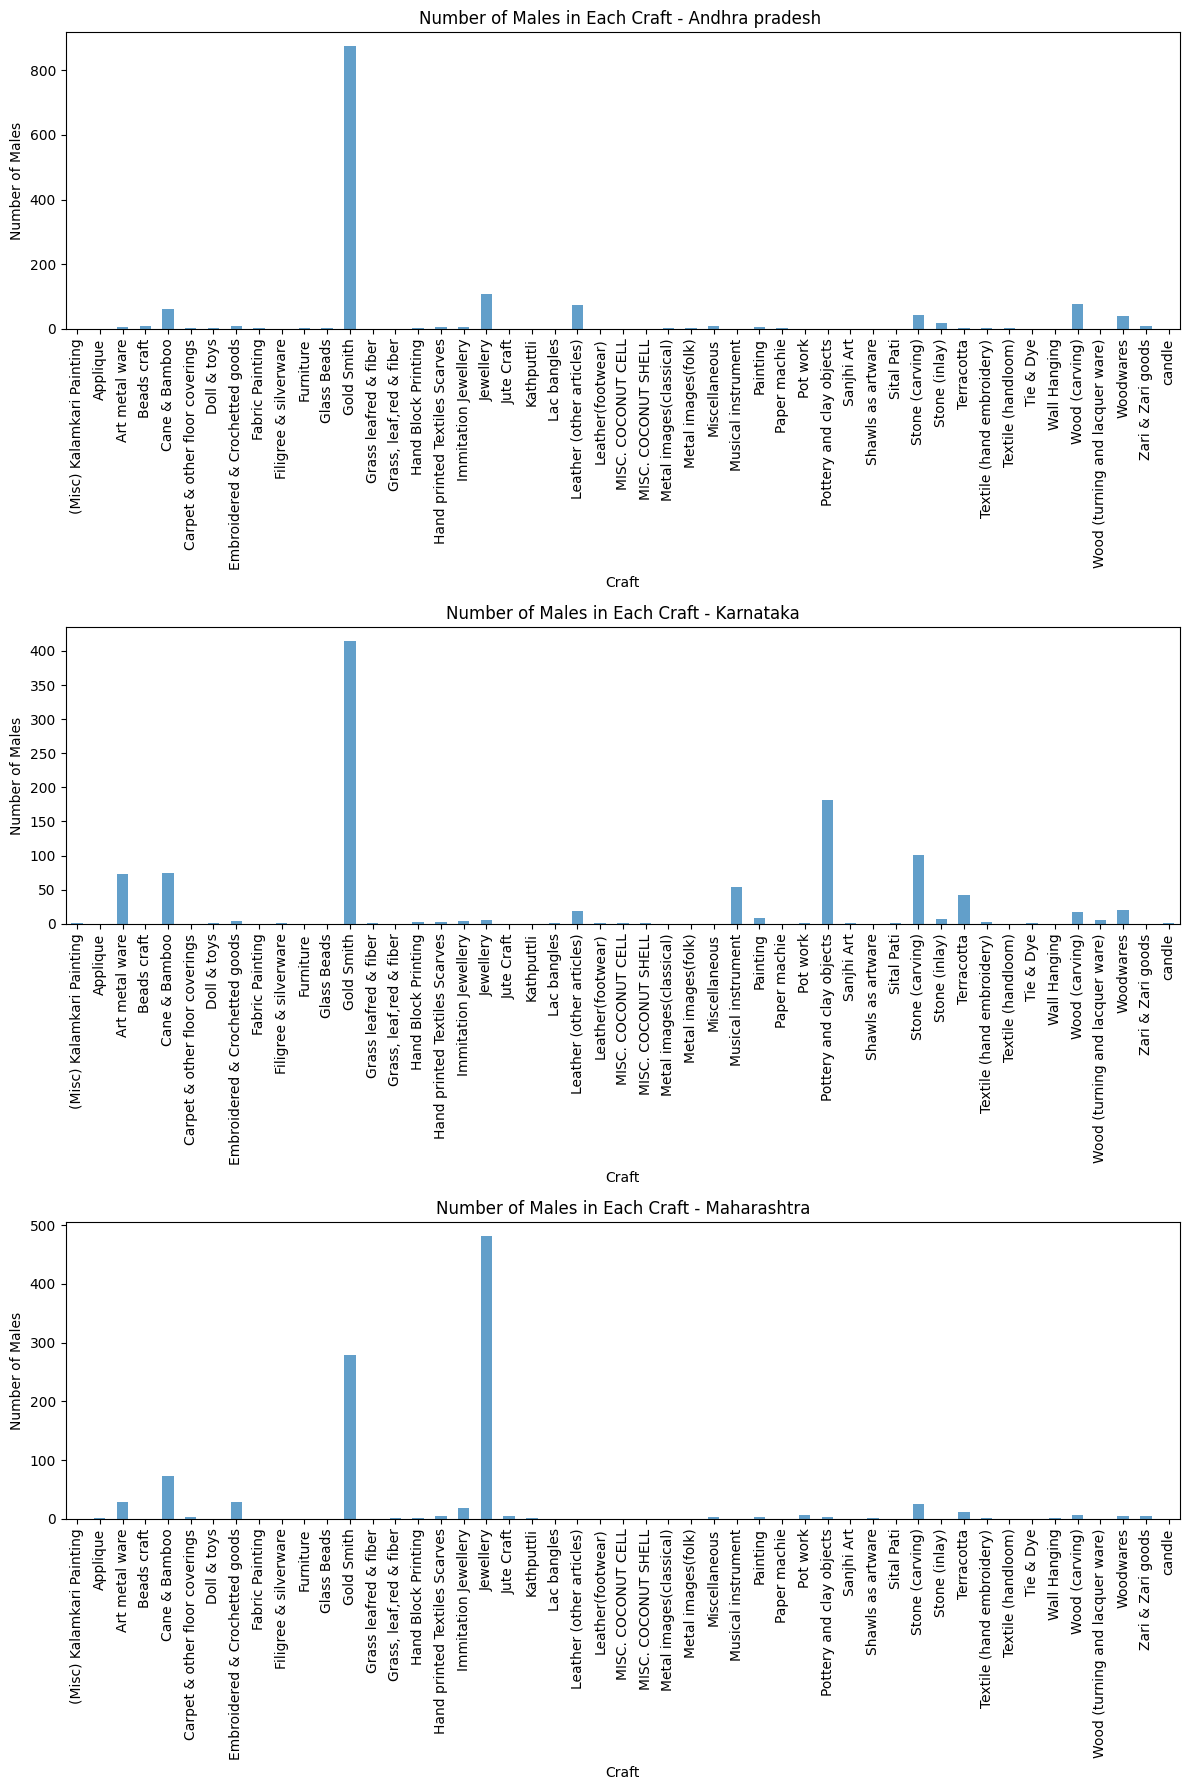

In [16]:
male_df = df[df['Gender'] == 'Male']

# Group by 'State' and 'Craft' and count occurrences
state_craft_male_counts = male_df.groupby(['State', 'Craft']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=len(state_craft_male_counts), ncols=1, figsize=(12, 6 * len(state_craft_male_counts)))

for i, state in enumerate(state_craft_male_counts.index):
    craft_male_counts = state_craft_male_counts.loc[state]
    craft_male_counts.plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_xlabel('Craft')
    axes[i].set_ylabel('Number of Males')
    axes[i].set_title(f'Number of Males in Each Craft - {state}')
    axes[i].legend().set_visible(False)
plt.tight_layout()
plt.show()


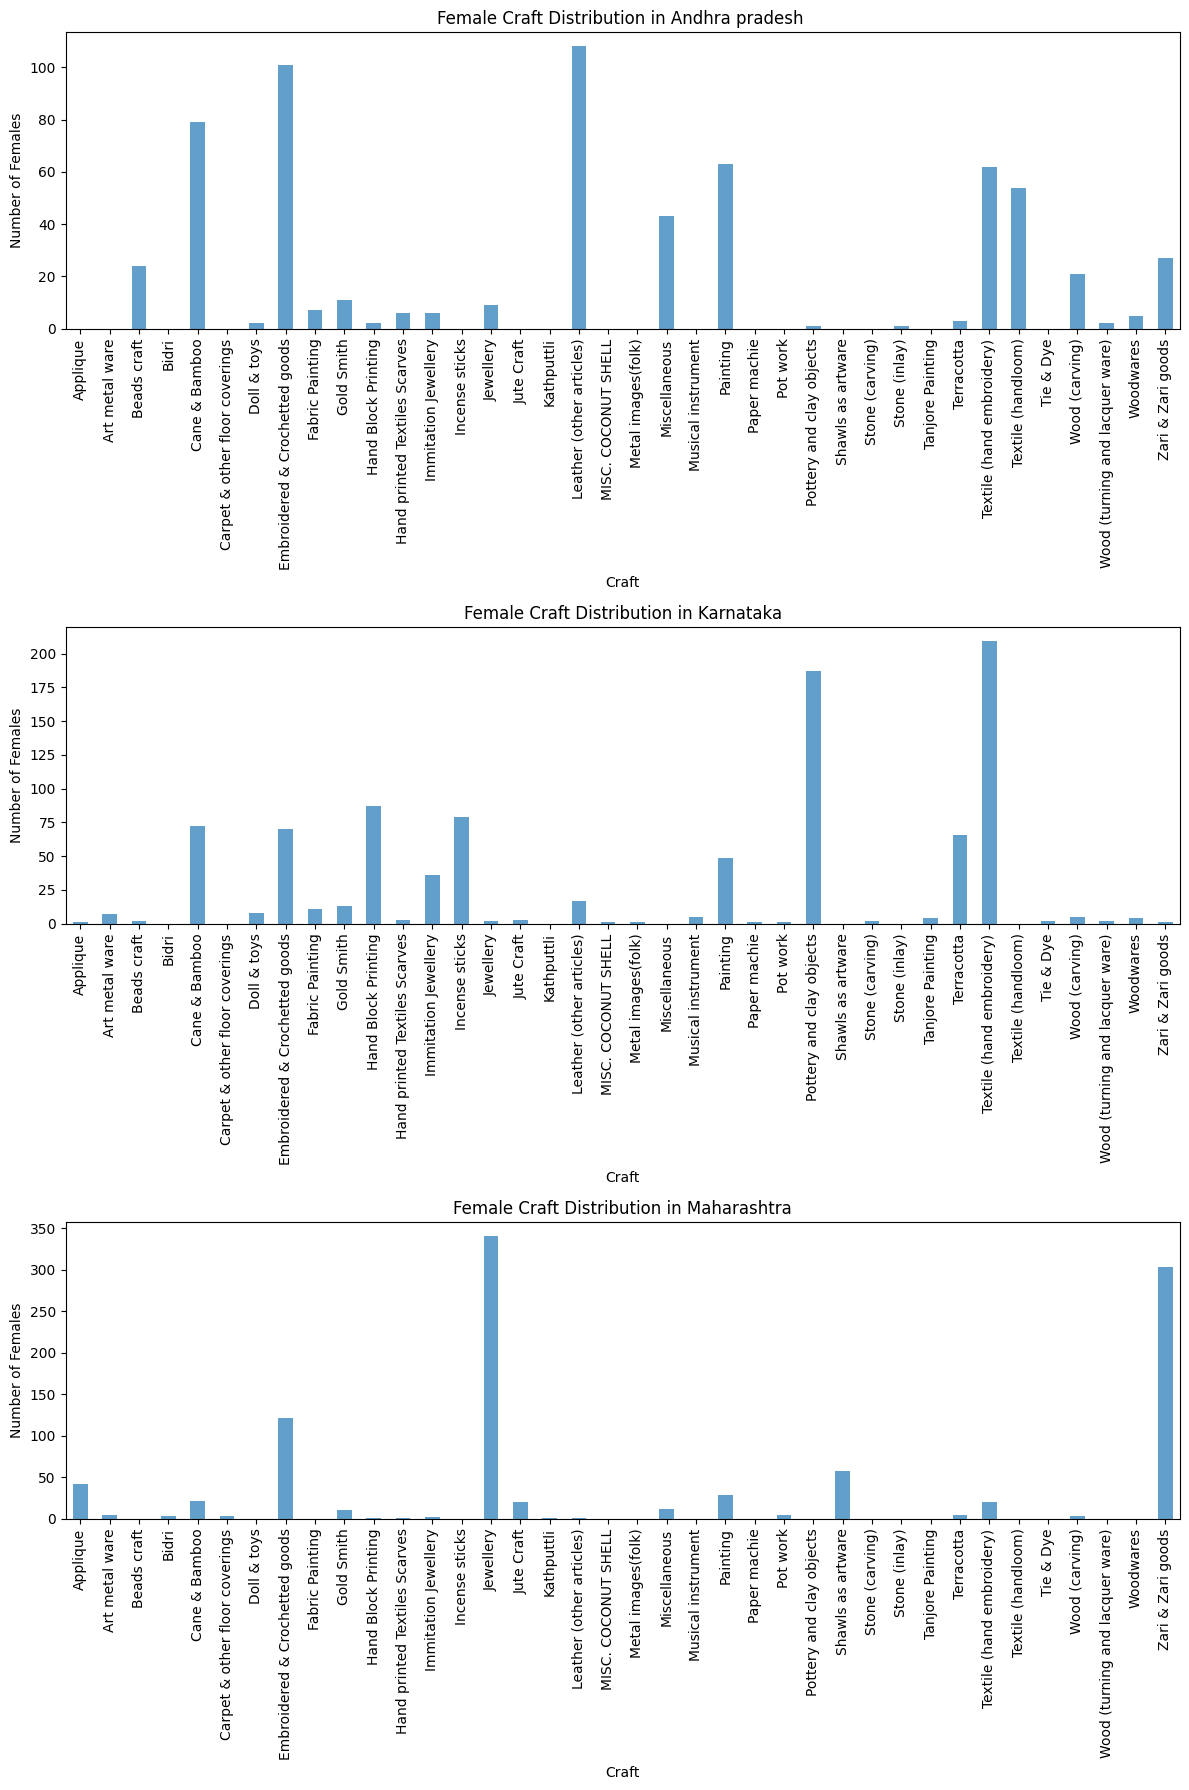

In [17]:
female_df = df[df['Gender'] == 'Female']

state_craft_female_counts = female_df.groupby(['State', 'Craft']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=len(state_craft_female_counts), ncols=1, figsize=(12, 6 * len(state_craft_female_counts)))

for i, state in enumerate(state_craft_female_counts.index):
    craft_counts = state_craft_female_counts.loc[state]
    craft_counts.plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_xlabel('Craft')
    axes[i].set_ylabel('Number of Females')
    axes[i].set_title(f'Female Craft Distribution in {state}')

plt.tight_layout()
plt.show()


In [18]:
#This code is to find the number of artisans present in one area with the help of pincode
df['Pin Code'] = df['Address of the Artisan'].str.extract(r'(\d{6})')

gender_counts_by_pin = df.groupby(['Pin Code', 'Gender']).size().unstack(fill_value=0)

# Display the results
print(gender_counts_by_pin)


Gender    Female  Male
Pin Code              
101665         0     1
113102         1     0
113417         0     1
126512         1     0
143514         1     0
...          ...   ...
913507         0     1
913515         1     0
931123         0     1
960062         0     1
960497         1     0

[615 rows x 2 columns]


In [21]:
# Filter rows where 'Mobile number of the Artisan' is NaN
filtered_data = df[df['Mobile number of the Artisan'].isna()]

# Save the filtered data to a new Excel file
filtered_data.to_excel("Filtered_Artisans.xlsx", index=False)

print(filtered_data)

      Sr. No. Pahchan card number           Name of the Artisan  \
175       176          SRTPC09248             KONKA THIRUMALESH   
191       192          SRTPC09264                      V BALAJI   
215       216          SRTPC09288    SUBRAHMANYA CHARI ARIKATLA   
220       221         SRTPC104396               p.srinivasa rao   
223       224         SRTPC104399        KADIAYAM SAIYANARAYANA   
...       ...                 ...                           ...   
5917     5918         WRADC200369   DHEERAJ SANJAY SONAR DUSABE   
5932     5933         WRADC200393       MAHENDRA SHAMRAO JAGTAP   
5938     5939         WRADC200411          CHATUR BHAGWAN SONAR   
5945     5946         WRADC200474  RAVINDRA BASANTRAO VIBHANDIK   
5962     5963         WRADC200597      SONAR RAVINDRA ANNASHITH   

                Craft  Mobile number of the Artisan Gender  \
175   Stone (carving)                           NaN   Male   
191        Gold Smith                           NaN   Male   
215   Sto

In [30]:
# Perform collaborative filtering on the dataset

# Sample data (replace with the actual data)
# Assuming that have a dataset with user IDs, item IDs, and ratings
data = {'user_id': [1, 1, 2, 2, 3, 3, 3, 4, 4, 5],
        'item_id': [1, 2, 1, 3, 2, 3, 4, 1, 3, 2],
        'rating': [5, 4, 3, 4, 5, 1, 2, 3, 5, 4]}
df = pd.DataFrame(data)


In [31]:
# Create a user-item matrix
user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(user_item_matrix.values)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(sparse_matrix)


In [32]:
# Function to get top N similar users for a given user
def get_top_similar_users(user_id, top_n=3):
  user_index = user_id - 1  # Adjust for zero-based indexing
  similarity_scores = user_similarity[user_index]
  top_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]  # Exclude the user itself
  top_users = [i + 1 for i in top_indices]  # Convert back to user IDs
  return top_users

In [33]:
# Function to predict rating for a user and item
def predict_rating(user_id, item_id):
  top_users = get_top_similar_users(user_id)
  user_index = user_id - 1
  item_index = item_id - 1
  predicted_rating = 0
  total_similarity = 0

  for similar_user in top_users:
    similar_user_index = similar_user - 1
    similarity = user_similarity[user_index][similar_user_index]
    rating = user_item_matrix.iloc[similar_user_index, item_index]
    predicted_rating += similarity * rating
    total_similarity += similarity

  if total_similarity == 0:
    return 0  # Handle cases where no similar users have rated the item
  else:
    return predicted_rating / total_similarity

In [34]:
# Example usage:
user_id = 1
item_id = 4
predicted_rating = predict_rating(user_id, item_id)
print(f"Predicted rating for user {user_id} for item {item_id}: {predicted_rating}")

Predicted rating for user 1 for item 4: 0.6856291224434253


In [35]:
# Perform content based filtering
# Sample data (replace with the actual data)
data = {'item_id': [1, 2, 3, 4, 5],
        'description': [
            "This is a beautiful handmade ceramic vase.",
            "Handwoven silk scarf with intricate patterns.",
            "Unique wooden sculpture with a rustic finish.",
            "Leather handbag with a vintage design.",
            "Handmade jewelry with precious stones."
        ]}
df = pd.DataFrame(data)

In [38]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the item descriptions
tfidf_matrix = tfidf.fit_transform(df['description'])

# Calculate cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [39]:
# Function to get top N similar items for a given item
def get_top_similar_items(item_id, top_n=3):
  item_index = item_id - 1  # Adjust for zero-based indexing
  similarity_scores = cosine_sim[item_index]
  top_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]  # Exclude the item itself
  top_items = [i + 1 for i in top_indices]  # Convert back to item IDs
  return top_items

In [40]:
# Example usage:
item_id = 1
similar_items = get_top_similar_items(item_id)
print(f"Top similar items for item {item_id}: {similar_items}")


Top similar items for item 1: [5, 4, 3]
